In [79]:
# Impor paket-paket yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, uniform, gamma, poisson, binom, bernoulli
from scipy.stats import t

## Memuat Data

In [34]:
# Memuat dataset ke dalam DataFrame
df_ori = pd.read_csv('nyc-rolling-sales.csv')

# Menampilkan beberapa baris pertama dataset
df_ori.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [35]:
# Menampilkan beberapa baris pertama dataset
df_ori.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [36]:
# Menampilkan informasi tentang dataset
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [37]:
# Menampilkan informasi tentang dataset
df_ori.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [38]:
# Menampilkan jumlah baris dan kolom dalam dataset
df_ori.shape

(84548, 22)

(84548, 22), itu berarti DataFrame memiliki 84548 baris dan 22 kolom.

In [39]:
# Menampilkan nama-nama kolom dalam dataset
df_ori.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [40]:
# Melihat tipe data dari setiap kolom
df_ori.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [41]:

# Melihat informasi statistik untuk kolom-kolom numerik
df_ori.describe(include=[np.number])

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [42]:
# Melihat informasi statistik untuk kolom-kolom non-numerik
df_ori.describe(include=['object'])

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548
unique,254,47,11,1,167,67563,3989,6062,5691,166,10008,364
top,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,,D4,131-05 40TH ROAD,,-,-,R4,-,2017-06-29 00:00:00
freq,3068,18235,38633,84548,12663,210,65496,26252,27612,12989,14561,544


In [43]:
# Melihat tipe data dan jumlah nilai unik untuk setiap kolom
for col in df_ori.columns:
    print(f"\nKolom: {col}")
    print(f"Tipe Data: {df_ori[col].dtype}")
    print(f"Jumlah Nilai Unik: {df_ori[col].nunique()}")


Kolom: Unnamed: 0
Tipe Data: int64
Jumlah Nilai Unik: 26736

Kolom: BOROUGH
Tipe Data: int64
Jumlah Nilai Unik: 5

Kolom: NEIGHBORHOOD
Tipe Data: object
Jumlah Nilai Unik: 254

Kolom: BUILDING CLASS CATEGORY
Tipe Data: object
Jumlah Nilai Unik: 47

Kolom: TAX CLASS AT PRESENT
Tipe Data: object
Jumlah Nilai Unik: 11

Kolom: BLOCK
Tipe Data: int64
Jumlah Nilai Unik: 11566

Kolom: LOT
Tipe Data: int64
Jumlah Nilai Unik: 2627

Kolom: EASE-MENT
Tipe Data: object
Jumlah Nilai Unik: 1

Kolom: BUILDING CLASS AT PRESENT
Tipe Data: object
Jumlah Nilai Unik: 167

Kolom: ADDRESS
Tipe Data: object
Jumlah Nilai Unik: 67563

Kolom: APARTMENT NUMBER
Tipe Data: object
Jumlah Nilai Unik: 3989

Kolom: ZIP CODE
Tipe Data: int64
Jumlah Nilai Unik: 186

Kolom: RESIDENTIAL UNITS
Tipe Data: int64
Jumlah Nilai Unik: 176

Kolom: COMMERCIAL UNITS
Tipe Data: int64
Jumlah Nilai Unik: 55

Kolom: TOTAL UNITS
Tipe Data: int64
Jumlah Nilai Unik: 192

Kolom: LAND SQUARE FEET
Tipe Data: object
Jumlah Nilai Unik: 6062



Kolom "BOROUGH": mewakili borough/daerah di New York City. Ada 5 borough yang berbeda di New York City (Manhattan, Bronx, Brooklyn, Queens, dan Staten Island), sehingga jumlah nilai uniknya adalah 5.

## Identifikasi Missing Value dan/atau Tidak Valid

In [44]:
# Mengecek nilai yang hilang untuk setiap kolom
df_ori.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64


Dengan melihat hasil, terlihat bahwa tidak ada nilai yang hilang (missing value) dalam setiap kolom dataset. Semua kolom memiliki jumlah entri yang sama dengan jumlah total baris dalam dataset.

In [45]:
# Mengecek nilai yang tidak valid untuk setiap kolom (misalnya, nilai yang sangat besar atau sangat kecil)
df_ori.isin([np.nan, np.inf, -np.inf]).sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [46]:
# Pembersihan Data
# Mengganti nilai yang hilang dengan nilai median pada kolom-kolom numerik
# Pilih hanya kolom-kolom numerik
numeric_cols = df_ori.select_dtypes(include=[np.number])

# Hitung median untuk setiap kolom numerik
median_values = numeric_cols.median()

# Mengganti nilai yang hilang dengan nilai median pada kolom-kolom numerik
df_ori.fillna(median_values, inplace=True)

In [47]:
df_ori.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [48]:
# Mengatasi nilai yang tidak valid (contoh: menghapus baris dengan nilai yang tidak valid pada kolom tertentu)
df_ori= df_ori[df_ori['BOROUGH'].notna()]
df_ori

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


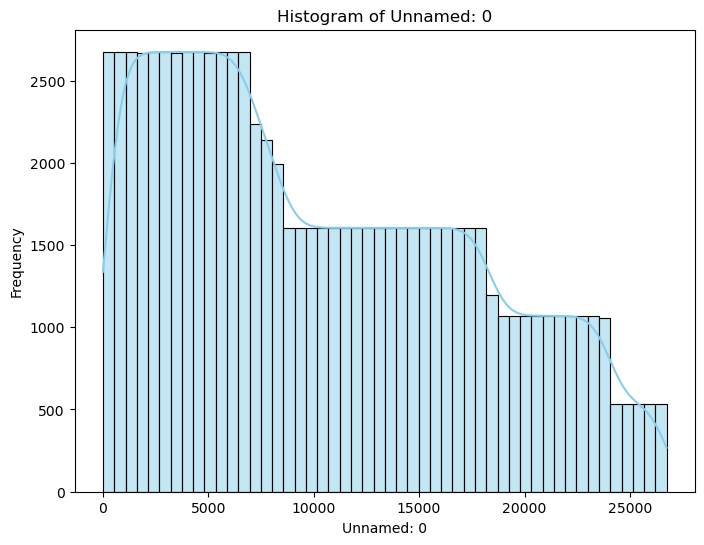

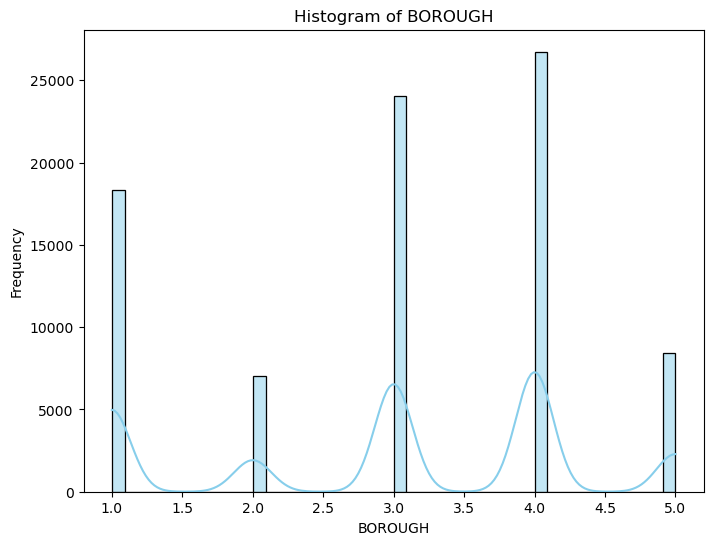

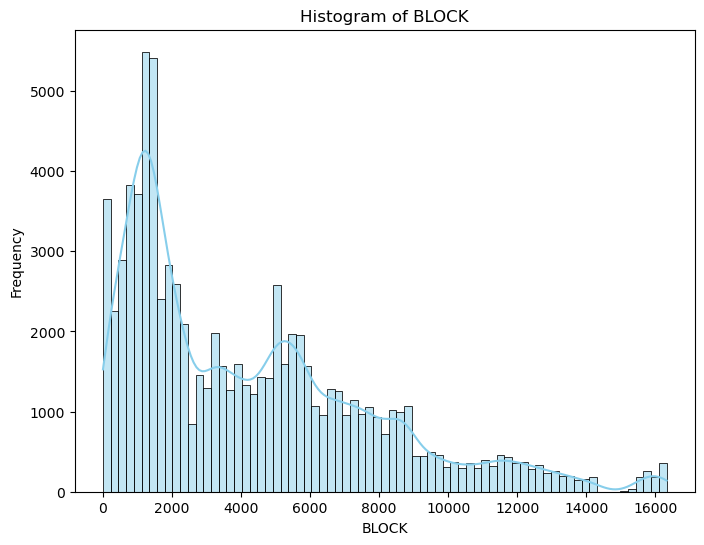

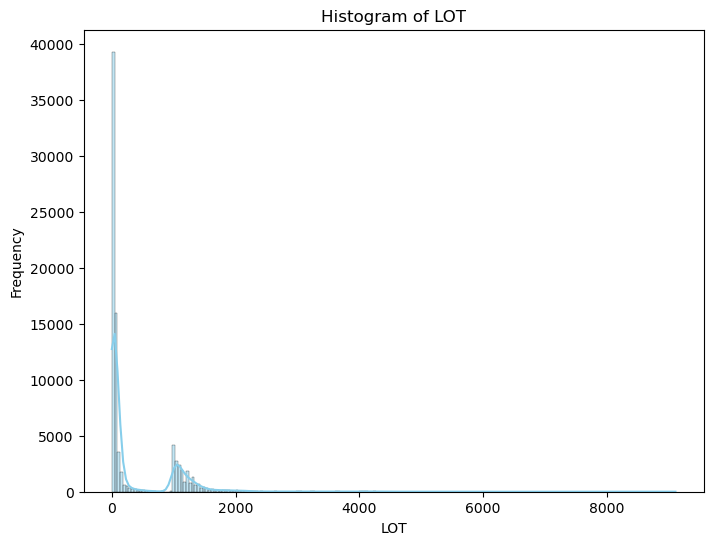

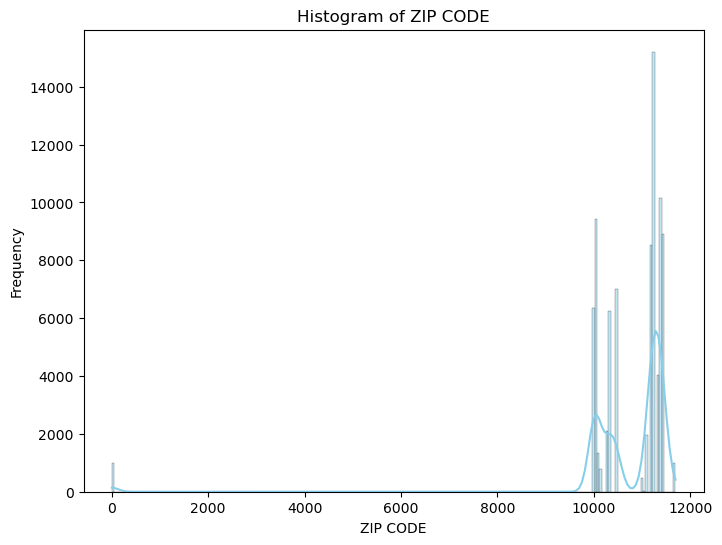

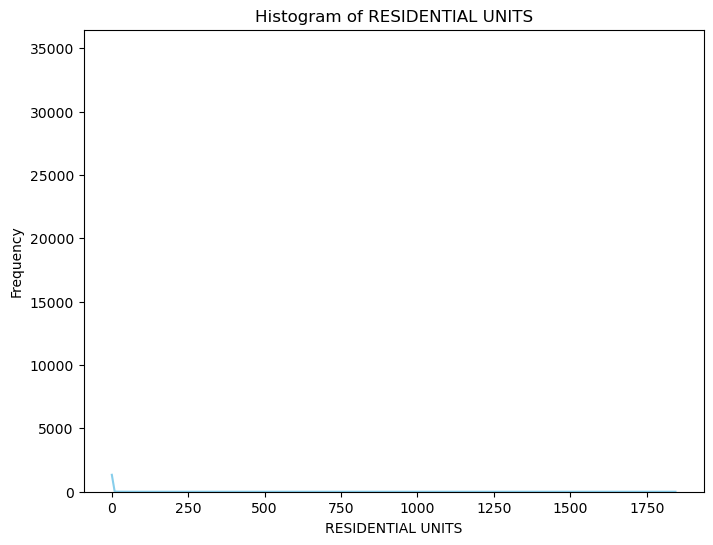

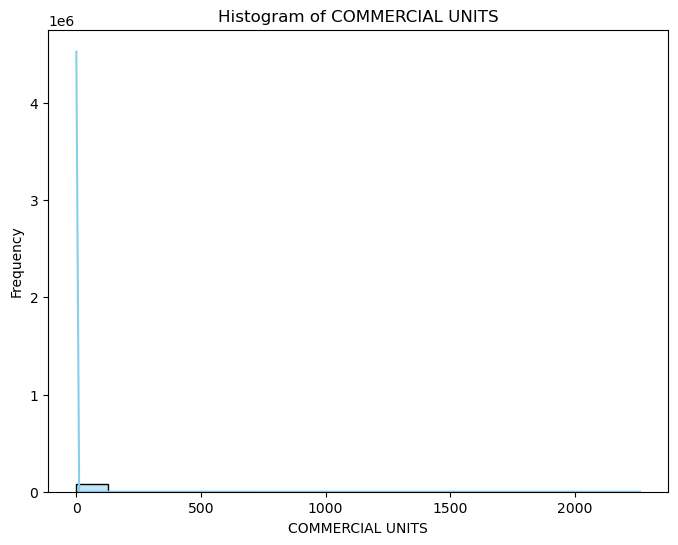

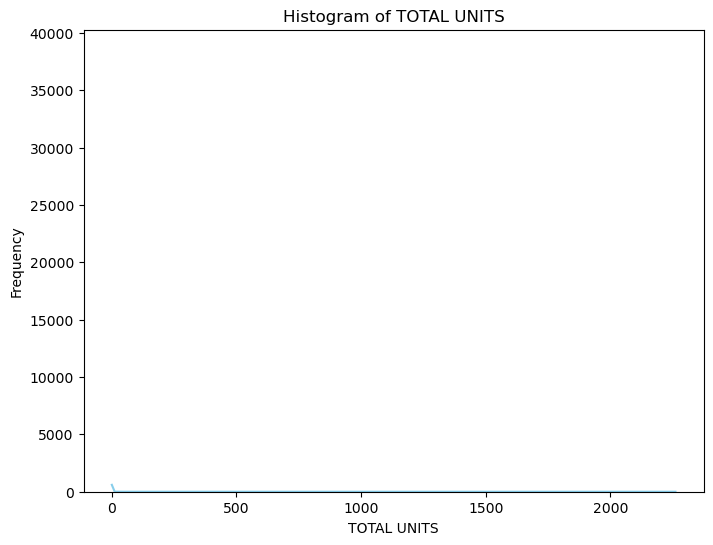

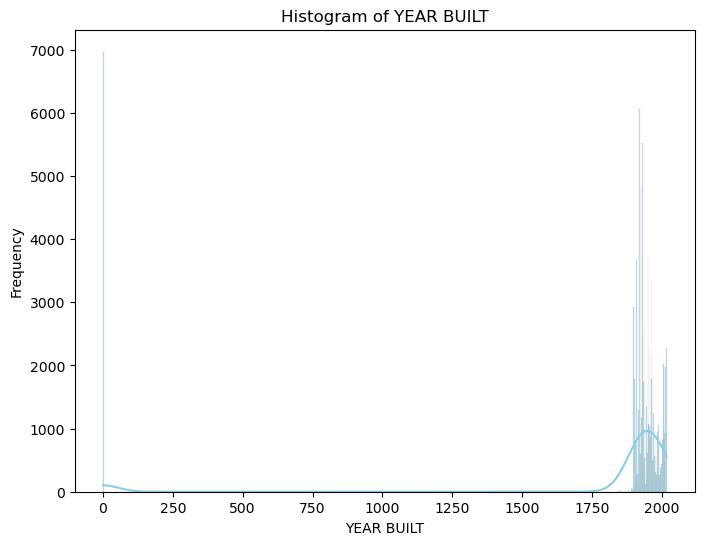

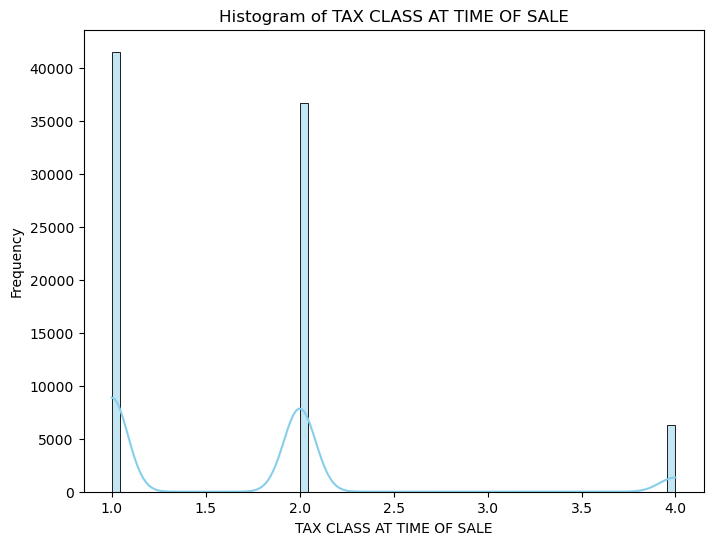

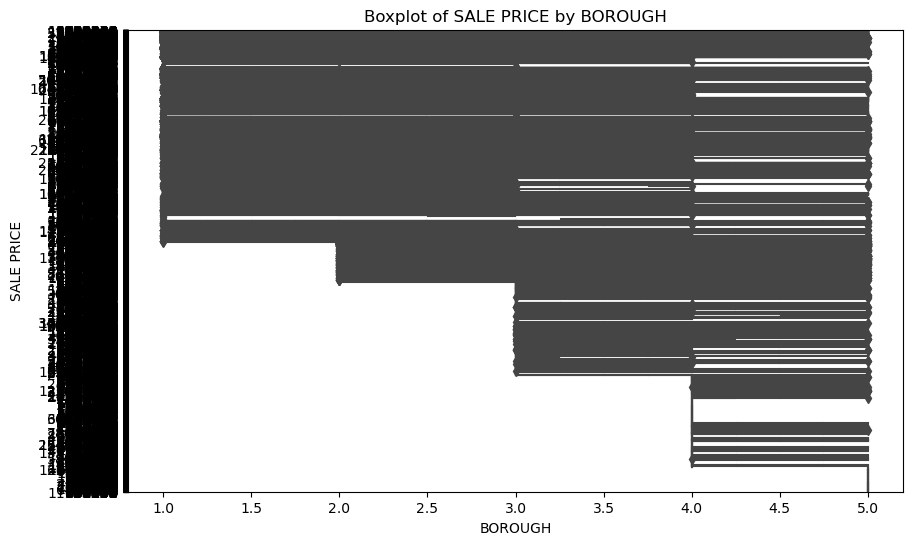

c:\Users\Lenovo\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


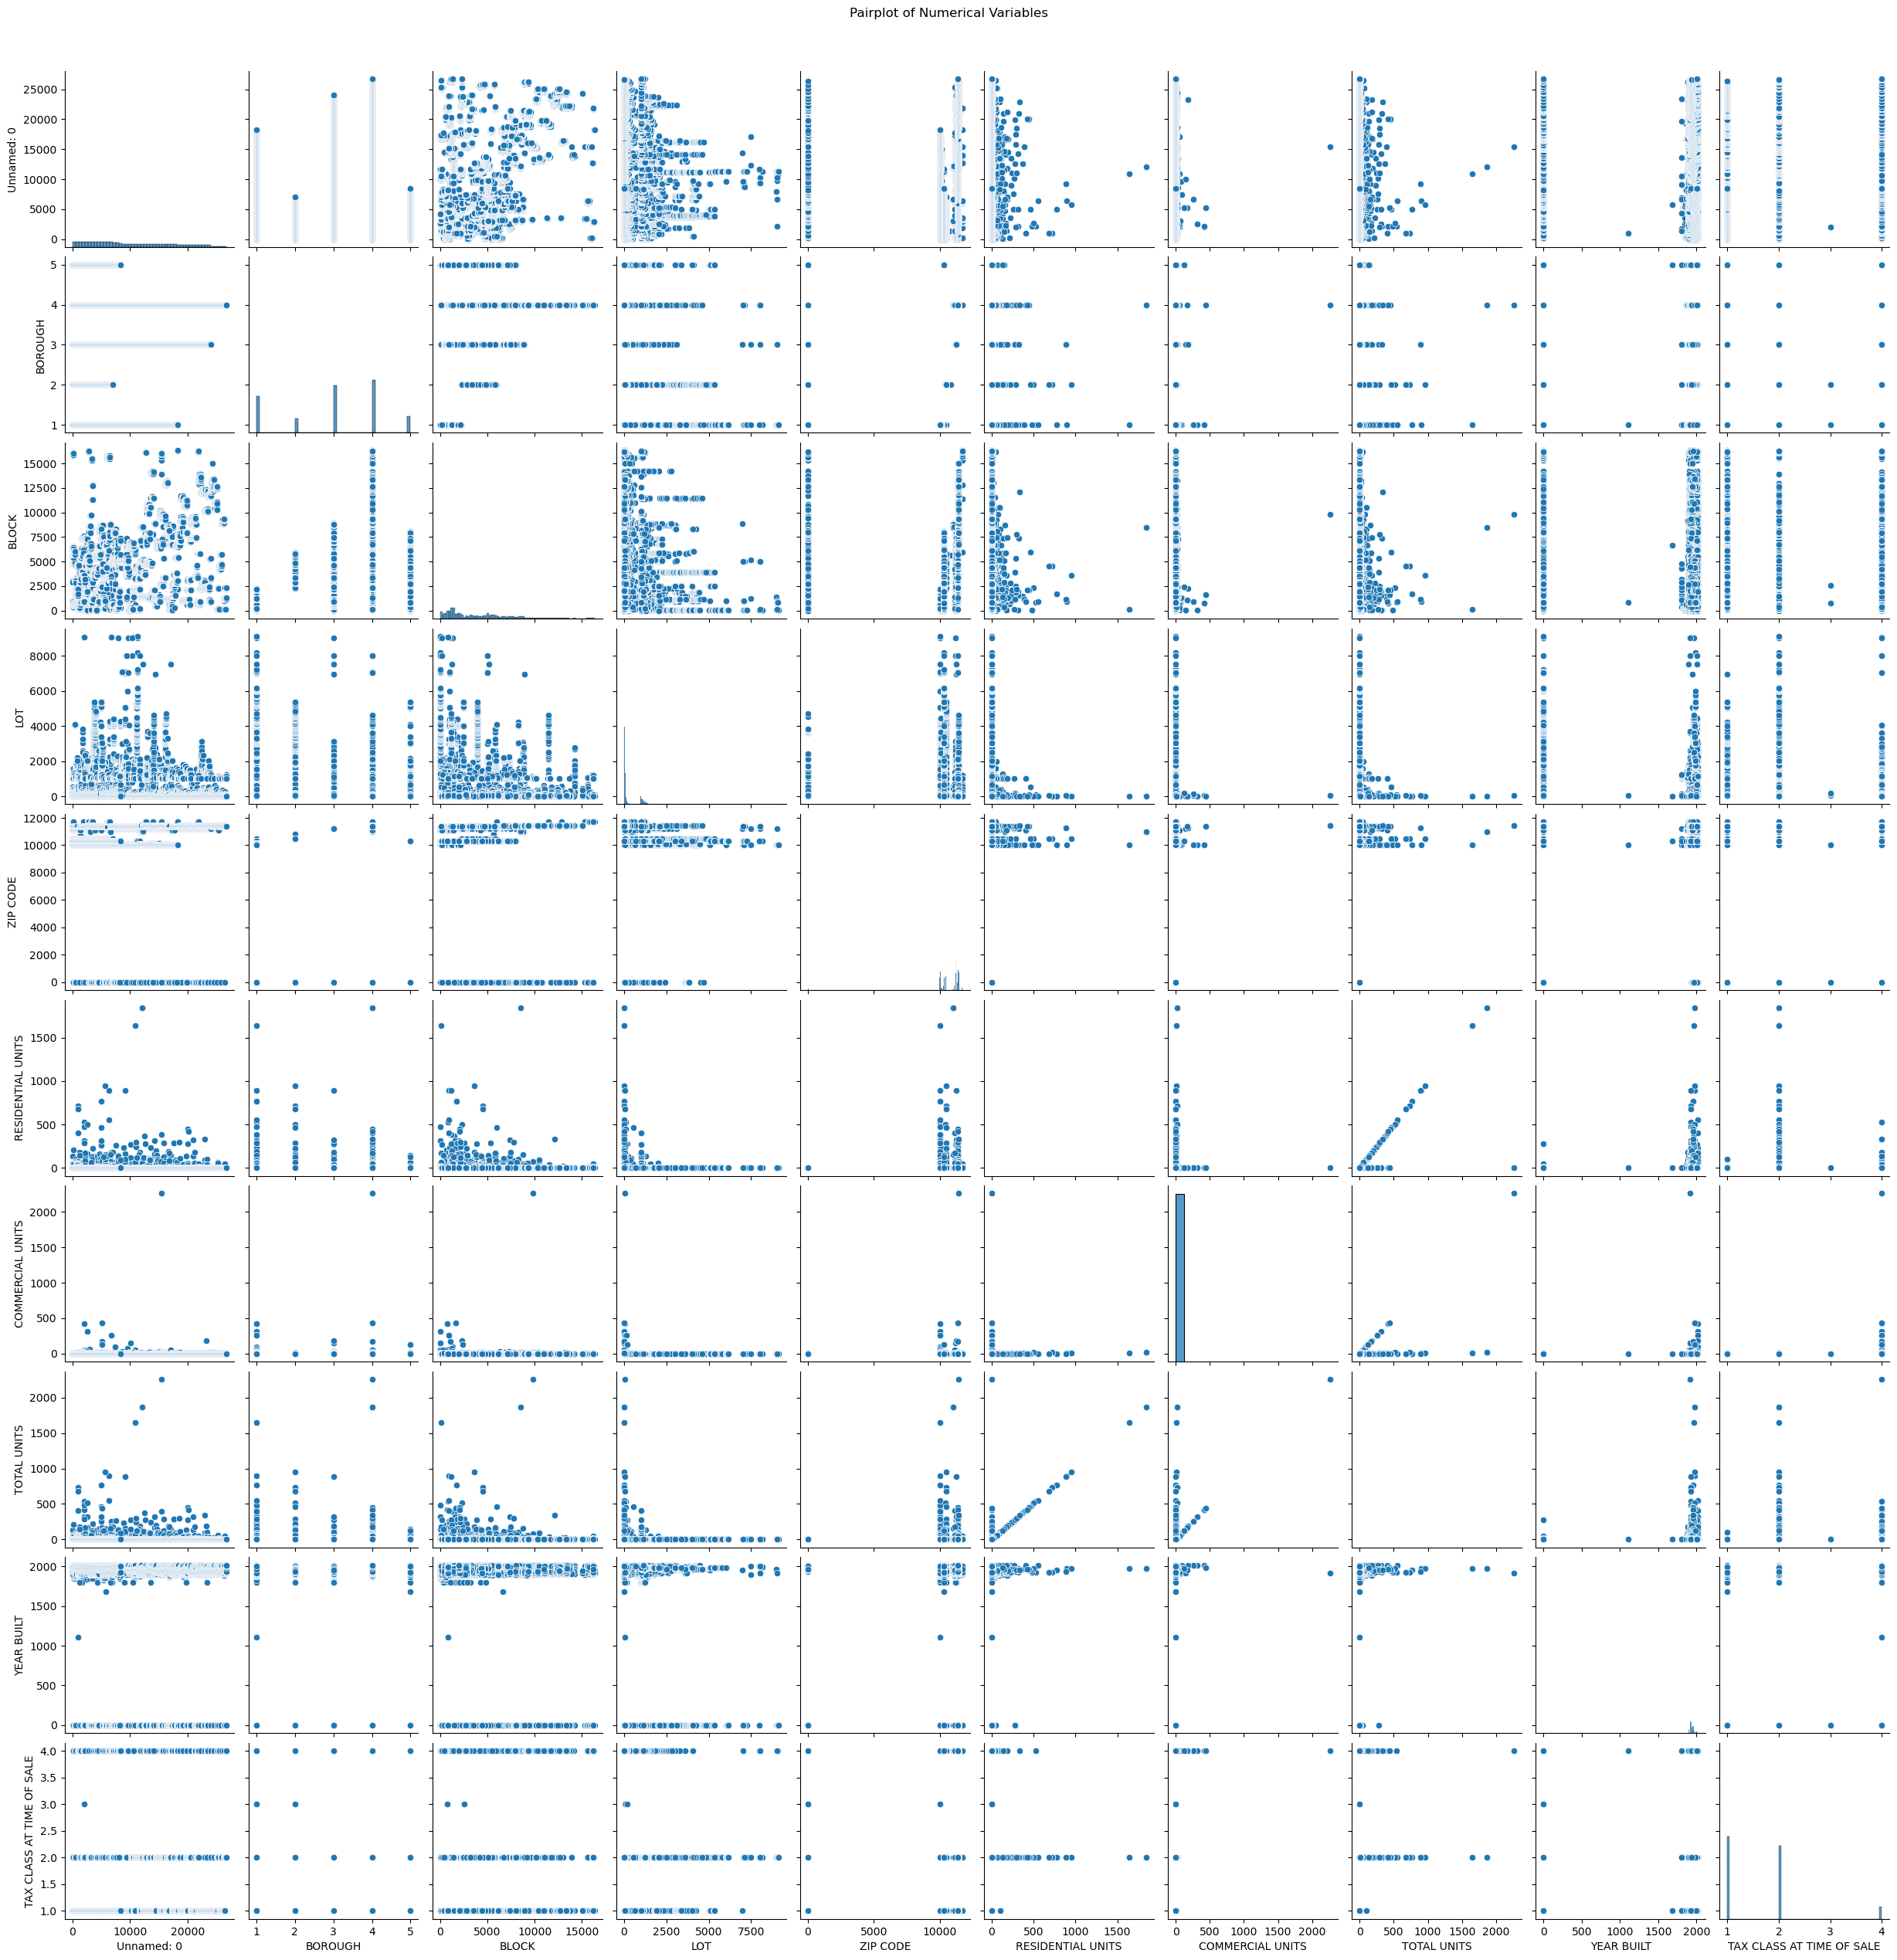


Statistik deskriptif untuk variabel numerik:
         Unnamed: 0       BOROUGH         BLOCK           LOT      ZIP CODE  \
count  84548.000000  84548.000000  84548.000000  84548.000000  84548.000000   
mean   10344.359878      2.998758   4237.218976    376.224015  10731.991614   
std     7151.779436      1.289790   3568.263407    658.136814   1290.879147   
min        4.000000      1.000000      1.000000      1.000000      0.000000   
25%     4231.000000      2.000000   1322.750000     22.000000  10305.000000   
50%     8942.000000      3.000000   3311.000000     50.000000  11209.000000   
75%    15987.250000      4.000000   6281.000000   1001.000000  11357.000000   
max    26739.000000      5.000000  16322.000000   9106.000000  11694.000000   

       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS    YEAR BUILT  \
count       84548.000000      84548.000000  84548.000000  84548.000000   
mean            2.025264          0.193559      2.249184   1789.322976   
std            16.72

In [50]:
# Sajikan data secara visual

# Histogram untuk variabel numerik
numeric_cols = df_ori.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_ori[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplot untuk melihat sebaran data dan outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df_ori)
plt.title('Boxplot of SALE PRICE by BOROUGH')
plt.xlabel('BOROUGH')
plt.ylabel('SALE PRICE')
plt.show()

# Scatter plot untuk melihat korelasi antar variabel numerik
sns.pairplot(df_ori[numeric_cols])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# Hitung statistik deskriptif
print("\nStatistik deskriptif untuk variabel numerik:")
print(df_ori.describe())

# Hitung mode untuk variabel numerik
print("\nMode untuk variabel numerik:")
print(df_ori.mode(numeric_only=True).iloc[0])

# Hitung distribusi kategori untuk variabel kategorikal
categorical_cols = df_ori.select_dtypes(include='object').columns
print("\nDistribusi kategori untuk variabel kategorikal:")
for col in categorical_cols:
    print("\n", df_ori[col].value_counts())

### Perhitungan Statistik Deskriptif

In [53]:
# Hitung statistik deskriptif untuk variabel numerik
numeric_stats = df_ori.describe()
print("Statistik Deskriptif untuk Variabel Numerik:")
print(numeric_stats)

Statistik Deskriptif untuk Variabel Numerik:
         Unnamed: 0       BOROUGH         BLOCK           LOT      ZIP CODE  \
count  84548.000000  84548.000000  84548.000000  84548.000000  84548.000000   
mean   10344.359878      2.998758   4237.218976    376.224015  10731.991614   
std     7151.779436      1.289790   3568.263407    658.136814   1290.879147   
min        4.000000      1.000000      1.000000      1.000000      0.000000   
25%     4231.000000      2.000000   1322.750000     22.000000  10305.000000   
50%     8942.000000      3.000000   3311.000000     50.000000  11209.000000   
75%    15987.250000      4.000000   6281.000000   1001.000000  11357.000000   
max    26739.000000      5.000000  16322.000000   9106.000000  11694.000000   

       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS    YEAR BUILT  \
count       84548.000000      84548.000000  84548.000000  84548.000000   
mean            2.025264          0.193559      2.249184   1789.322976   
std            16.721

In [60]:
# Pembersihan Data
# Menghapus baris yang mengandung nilai non-numerik pada variabel numerik
df_ori_clean = df_ori.select_dtypes(include='number').dropna()

# Hitung mean untuk variabel numerik yang telah dibersihkan
mean_values = df_ori_clean.mean()

# Tampilkan mean untuk variabel numerik
print("\nMean untuk Variabel Numerik:")
print(mean_values)


Mean untuk Variabel Numerik:
Unnamed: 0                   10344.359878
BOROUGH                          2.998758
BLOCK                         4237.218976
LOT                            376.224015
ZIP CODE                     10731.991614
RESIDENTIAL UNITS                2.025264
COMMERCIAL UNITS                 0.193559
TOTAL UNITS                      2.249184
YEAR BUILT                    1789.322976
TAX CLASS AT TIME OF SALE        1.657485
dtype: float64


In [58]:
# Menghapus baris yang mengandung nilai non-numerik pada variabel numerik
df_ori_clean = df_ori.select_dtypes(include='number').dropna()

# Hitung median untuk variabel numerik yang telah dibersihkan
median_values = df_ori_clean.median()

# Tampilkan median untuk variabel numerik
print("\nMedian untuk Variabel Numerik:")
print(median_values)


Median untuk Variabel Numerik:
Unnamed: 0                    8942.0
BOROUGH                          3.0
BLOCK                         3311.0
LOT                             50.0
ZIP CODE                     11209.0
RESIDENTIAL UNITS                1.0
COMMERCIAL UNITS                 0.0
TOTAL UNITS                      1.0
YEAR BUILT                    1940.0
TAX CLASS AT TIME OF SALE        2.0
dtype: float64


In [56]:
# Hitung mode untuk variabel numerik
mode_values = df_ori.mode(numeric_only=True).iloc[0]
print("\nMode untuk Variabel Numerik:")
print(mode_values)


Mode untuk Variabel Numerik:
Unnamed: 0                       4.0
BOROUGH                          4.0
BLOCK                         5066.0
LOT                              1.0
ZIP CODE                     10314.0
RESIDENTIAL UNITS                1.0
COMMERCIAL UNITS                 0.0
TOTAL UNITS                      1.0
YEAR BUILT                       0.0
TAX CLASS AT TIME OF SALE        1.0
Name: 0, dtype: float64


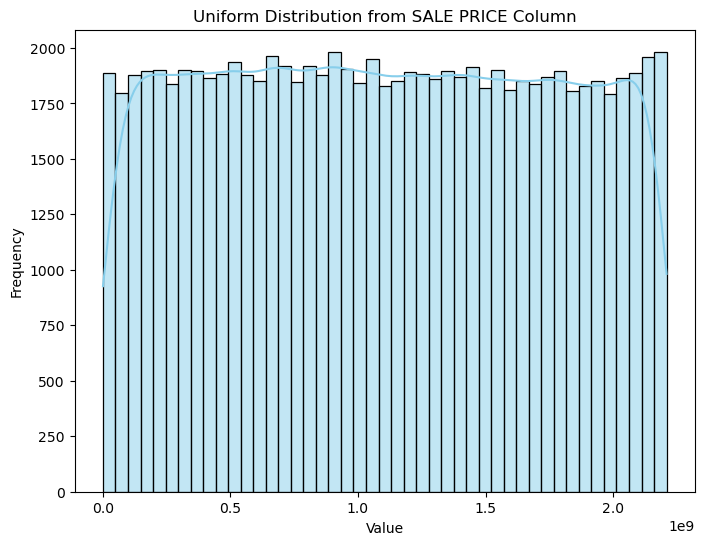

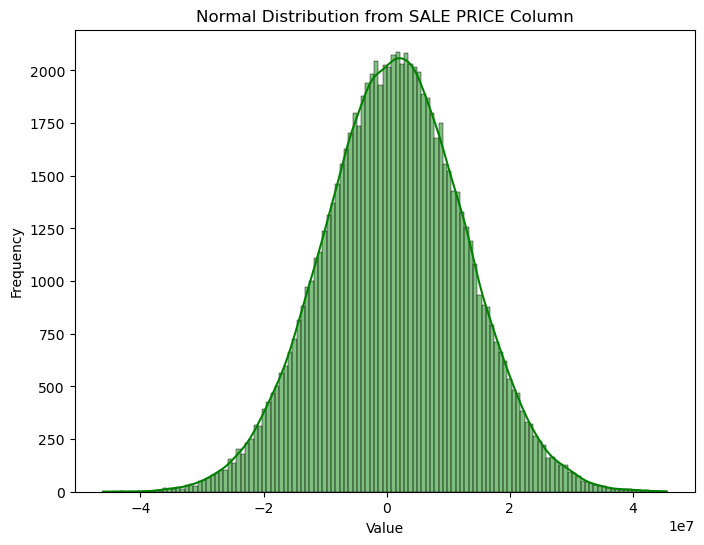

In [64]:
# Membersihkan nilai yang tidak valid dari kolom 'SALE PRICE'
cleaned_data = df_ori['SALE PRICE'].dropna()

# Pastikan bahwa semua nilai dalam kolom 'SALE PRICE' adalah numerik
cleaned_data = pd.to_numeric(cleaned_data, errors='coerce').dropna()

# Membuat distribusi uniform dari data yang telah dibersihkan
uniform_data = uniform.fit(cleaned_data)

# Membuat distribusi normal dari data yang telah dibersihkan
normal_data = norm.fit(cleaned_data)

# Membuat sampel data dari distribusi uniform
data_uniform = uniform.rvs(size=len(df_ori), loc=uniform_data[0], scale=uniform_data[1])

# Membuat sampel data dari distribusi normal
data_normal = norm.rvs(size=len(df_ori), loc=normal_data[0], scale=normal_data[1])

# Visualisasi distribusi uniform
plt.figure(figsize=(8, 6))
sns.histplot(data_uniform, kde=True, color='skyblue')
plt.title('Uniform Distribution from SALE PRICE Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Visualisasi distribusi normal
plt.figure(figsize=(8, 6))
sns.histplot(data_normal, kde=True, color='green')
plt.title('Normal Distribution from SALE PRICE Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

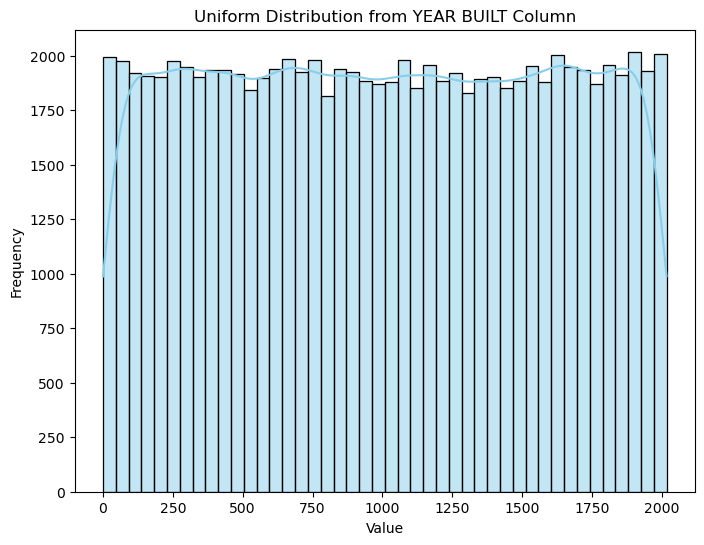

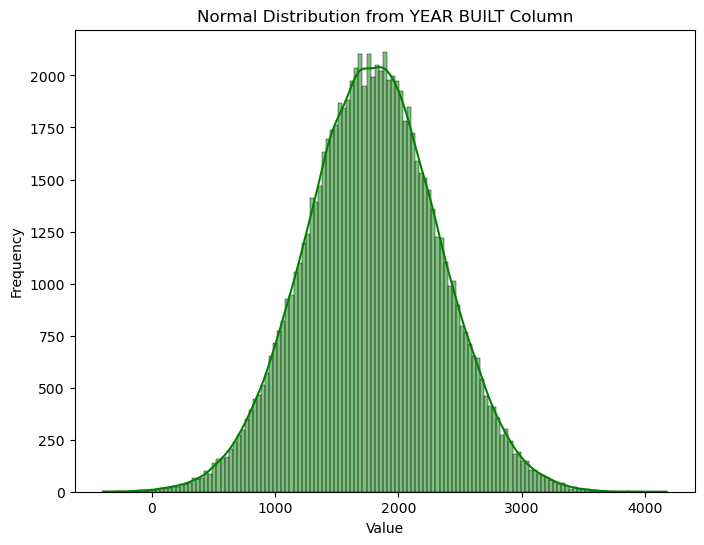

In [65]:
# Membersihkan nilai yang tidak valid dari kolom 'YEAR BUILT'
cleaned_data = df_ori['YEAR BUILT'].dropna()

# Pastikan bahwa semua nilai dalam kolom 'YEAR BUILT' adalah numerik
cleaned_data = pd.to_numeric(cleaned_data, errors='coerce').dropna()

# Membuat distribusi uniform dari data yang telah dibersihkan
uniform_data = uniform.fit(cleaned_data)

# Membuat distribusi normal dari data yang telah dibersihkan
normal_data = norm.fit(cleaned_data)

# Membuat sampel data dari distribusi uniform
data_uniform = uniform.rvs(size=len(df_ori), loc=uniform_data[0], scale=uniform_data[1])

# Membuat sampel data dari distribusi normal
data_normal = norm.rvs(size=len(df_ori), loc=normal_data[0], scale=normal_data[1])

# Visualisasi distribusi uniform
plt.figure(figsize=(8, 6))
sns.histplot(data_uniform, kde=True, color='skyblue')
plt.title('Uniform Distribution from YEAR BUILT Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Visualisasi distribusi normal
plt.figure(figsize=(8, 6))
sns.histplot(data_normal, kde=True, color='green')
plt.title('Normal Distribution from YEAR BUILT Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

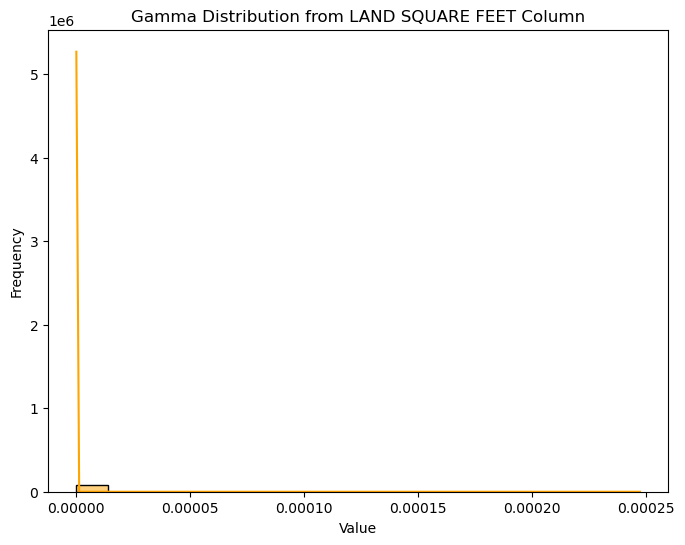

In [67]:

# Membersihkan nilai yang tidak valid dari kolom 'LAND SQUARE FEET'
cleaned_data = df_ori['LAND SQUARE FEET'].dropna()

# Pastikan bahwa semua nilai dalam kolom 'LAND SQUARE FEET' adalah numerik
cleaned_data = pd.to_numeric(cleaned_data, errors='coerce').dropna()

# Membuat distribusi gamma dari data yang telah dibersihkan
gamma_data = gamma.fit(cleaned_data)

# Membuat sampel data dari distribusi gamma
data_gamma = gamma.rvs(*gamma_data, size=len(df_ori))

# Visualisasi distribusi gamma
plt.figure(figsize=(8, 6))
sns.histplot(data_gamma, kde=True, color='orange')
plt.title('Gamma Distribution from LAND SQUARE FEET Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#### Distribusi Poisson

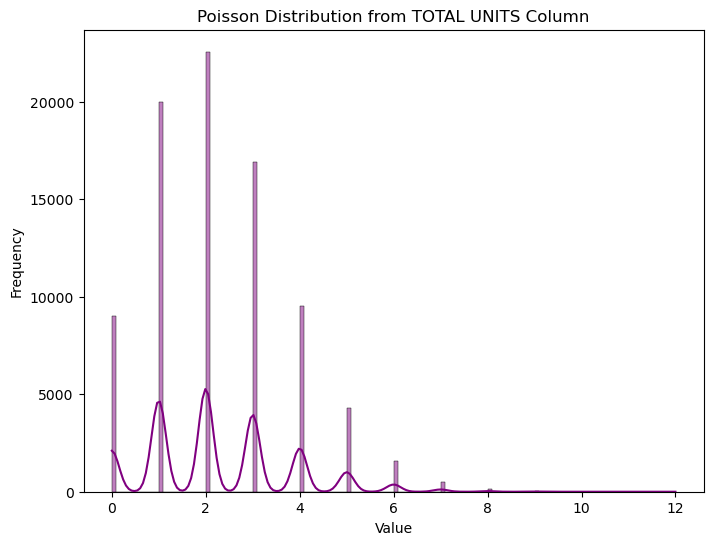

In [71]:
# Membersihkan nilai yang tidak valid dari kolom 'TOTAL UNITS'
cleaned_data = df_ori['TOTAL UNITS'].dropna()

# Pastikan bahwa semua nilai dalam kolom 'TOTAL UNITS' adalah numerik
cleaned_data = pd.to_numeric(cleaned_data, errors='coerce').dropna()

# Menghitung rata-rata dari data yang telah dibersihkan
mean_value = cleaned_data.mean()

# Membuat distribusi Poisson dengan rata-rata sebagai parameter
poisson_data = poisson(mu=mean_value)

# Membuat sampel data dari distribusi Poisson
data_poisson = poisson_data.rvs(size=len(df_ori))

# Visualisasi distribusi Poisson
plt.figure(figsize=(8, 6))
sns.histplot(data_poisson, kde=True, color='purple')
plt.title('Poisson Distribution from TOTAL UNITS Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#### Distribusi Binomial

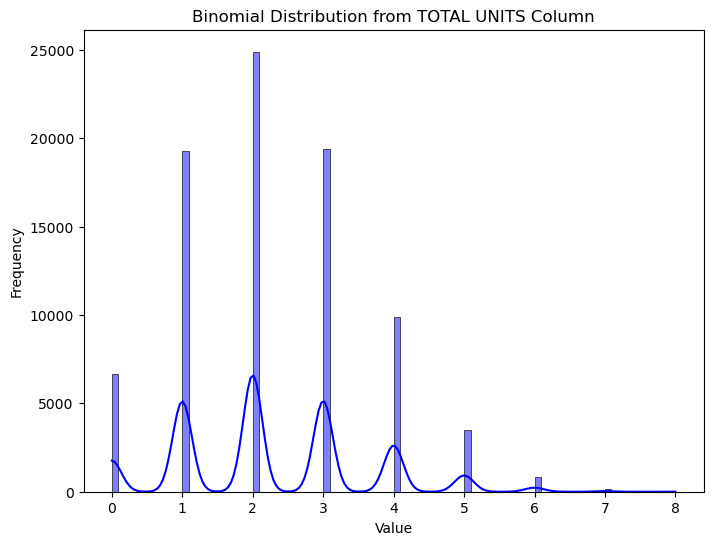

In [75]:


# Membersihkan nilai yang tidak valid dari kolom 'TOTAL UNITS'
cleaned_data = df_ori['TOTAL UNITS'].dropna()

# Pastikan bahwa semua nilai dalam kolom 'TOTAL UNITS' adalah numerik
cleaned_data = pd.to_numeric(cleaned_data, errors='coerce').dropna()

# Menghitung rata-rata dan varians dari data yang telah dibersihkan
mean_value = cleaned_data.mean()
variance_value = cleaned_data.var()

# Menghitung parameter n (jumlah percobaan) dan p (probabilitas sukses)
n = 10  # Misalnya, kita tentukan n secara manual
p = cleaned_data.mean() / n

# Membuat distribusi Binomial dengan parameter n dan p
binom_data = binom(n=n, p=p)

# Membuat sampel data dari distribusi Binomial
data_binom = binom_data.rvs(size=len(df_ori))

# Visualisasi distribusi Binomial
plt.figure(figsize=(8, 6))
sns.histplot(data_binom, kde=True, color='blue')
plt.title('Binomial Distribution from TOTAL UNITS Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#### Distribusi Bernoulli

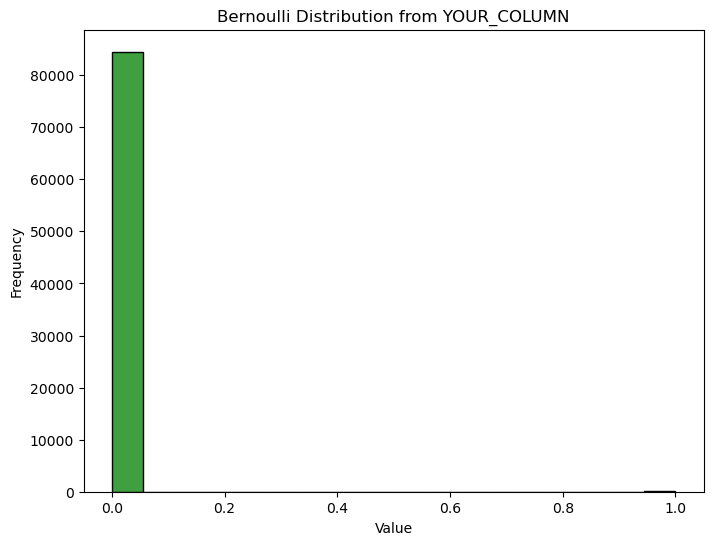

In [78]:

# Membersihkan nilai yang tidak valid dari kolom tertentu dalam dataset
cleaned_data = df_ori['SALE PRICE'].dropna()

# Pastikan bahwa semua nilai dalam kolom tersebut adalah numerik
cleaned_data = pd.to_numeric(cleaned_data, errors='coerce').dropna()

# Menghitung nilai p (probabilitas keberhasilan)
p = cleaned_data.mean() / cleaned_data.max()  # Misalnya, kita gunakan rata-rata relatif terhadap nilai maksimum

# Membuat distribusi Bernoulli dengan parameter p
bernoulli_data = bernoulli(p=p)

# Membuat sampel data dari distribusi Bernoulli
data_bernoulli = bernoulli_data.rvs(size=len(df_ori))

# Visualisasi distribusi Bernoulli
plt.figure(figsize=(8, 6))
sns.histplot(data_bernoulli, kde=False, color='green')
plt.title('Bernoulli Distribution from YOUR_COLUMN')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()